In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import calendar

pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('/kaggle/input/hotel-booking/hotel_bookings_data.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Data Preprocessing
Transform raw data into ready-to-use data

## Handle Null Values

In [4]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

There are 4 columns have null values. Let's check the value in those columns

In [5]:
df['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [6]:
df['city'].value_counts()

Kota Denpasar              48590
Kabupaten Bangka           12129
Kota Yogyakarta            10415
Kota Batu                   8568
Kabupaten Bandung           7287
                           ...  
Kabupaten Malang               1
Kabupaten Bekasi               1
Kabupaten Barito Kuala         1
Kota Palembang                 1
Kabupaten Maluku Tengah        1
Name: city, Length: 177, dtype: int64

In [7]:
df['agent'].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: agent, Length: 333, dtype: int64

In [8]:
df['company'].value_counts()

40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
104.0      1
531.0      1
160.0      1
413.0      1
386.0      1
Name: company, Length: 352, dtype: int64

After check the value inside the columns, here what I'll do to handle the missing values:
- For `children` `agent` and `company` columns will be filled with 0
- For `city` column will be filled with No City

In [9]:
df['children'].fillna(0, inplace=True)
df['agent'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)
df['city'].fillna('No City', inplace=True)

In [10]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

## Replace Similar Values

In [11]:
df['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64

Here I found similar values on Undefined and No Meal which can be merged into one value. I will replace Undefined to No Meal.

In [12]:
df['meal'].replace('Undefined', 'No Meal', inplace=True)

## Drop Unused Values

I create a `guest` column to count the total guest that comes from the sum of columns `adults` `children` and `babies`. Then I will drop these 3 columns because its already represented by the `guest` column

In [13]:
df.insert(12, 'guest', df['adults'] + df['children'] + df['babies'])
df.drop(['adults', 'children', 'babies'], axis=1, inplace=True)

In [14]:
df['guest'].value_counts()

2.0     82051
1.0     22581
3.0     10495
4.0      3929
0.0       180
5.0       137
26.0        5
12.0        2
27.0        2
20.0        2
10.0        2
40.0        1
50.0        1
55.0        1
6.0         1
Name: guest, dtype: int64

We can see above there is a 0 guest, which is a bit odd for a booking with no guest. So, I decided to replace the value with 1 because at least there must be 1 adult on the booking list.

In [15]:
df['guest'].replace(0, 1, inplace=True)

# Monthly Hotel Booking Analysis Based on Hotel Type
Which month or season the hotel booking will increase for each type of hotel?

First, I will aggregate the total bookings by years and months.

In [16]:
df[(df['arrival_date_year'] == 2017) & (df['arrival_date_month'] == 'February')]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,guest,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
3271,Resort Hotel,0,20,2017,February,49,1,0,0,1.0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,0.00,0,0,Check-Out
3272,Resort Hotel,0,118,2017,February,49,1,0,5,2.0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,32.40,0,1,Check-Out
3273,Resort Hotel,1,87,2017,February,49,1,2,5,2.0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,50.40,0,1,Canceled
3274,Resort Hotel,0,118,2017,February,49,1,2,5,2.0,Breakfast,Kabupaten Magelang,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,29.16,0,1,Check-Out
3275,Resort Hotel,0,82,2017,February,49,2,0,0,2.0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,0.00,0,2,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82699,City Hotel,0,69,2017,February,53,29,2,5,2.0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0.0,0,Contract,92.43,0,0,Check-Out
82704,City Hotel,0,57,2017,February,52,26,4,6,3.0,Breakfast,Kabupaten Sumedang,Online TA,TA/TO,0,0,0,1,No Deposit,11.0,0.0,0,Personal,113.85,0,0,Check-Out
82732,City Hotel,0,77,2017,February,53,31,2,4,2.0,Breakfast,Kabupaten Kepulauan Seribu,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0.0,0,Contract,100.97,0,1,Check-Out
82960,City Hotel,0,1,2017,February,50,12,0,1,1.0,Breakfast,Kota Denpasar,Offline TA/TO,TA/TO,0,0,2,1,No Deposit,94.0,0.0,0,Personal,0.00,0,0,Check-Out


In [17]:
df.groupby(['arrival_date_year', 'arrival_date_month'])['arrival_date_month'].count().reset_index(name='Total')

,arrival_date_year,arrival_date_month,Total
0,2017,December,4957
1,2017,February,2920
2,2017,January,2340
3,2017,November,5114
4,2017,October,3889
5,2017,September,2776
6,2018,April,3891
7,2018,August,5292
8,2018,December,6203
9,2018,February,3860


It showed that the months of 2017 were strange because, after February, it jumps into September. After some exploration, I found that on `arrival_date_day_of_month` in February, the latest date is the 31st, but in April, the latest date is the 29th, which should be in February. So, I need to replace the months by 2 months earlier.

In [18]:
# convert months to numbers
convert_month = {month: index for index, month in enumerate(calendar.month_name) if month} # convert months to numbers
df['arrival_date_month'] = [convert_month[x] for x in df['arrival_date_month']] 
# replace the months
df['arrival_date_month'] = np.where(df['arrival_date_month'] < 3, df['arrival_date_month'] + 10, df['arrival_date_month'] - 2)
df.groupby(['arrival_date_year', 'arrival_date_month'])['arrival_date_month'].count().reset_index(name='Total')

,arrival_date_year,arrival_date_month,Total
0,2017,7,2776
1,2017,8,3889
2,2017,9,5114
3,2017,10,4957
4,2017,11,2340
5,2017,12,2920
6,2018,1,2248
7,2018,2,3891
8,2018,3,4824
9,2018,4,5428


Next, I will aggregate the total bookings by the hotel name. But, I noticed that July and August appeared in 3 years while others only 2 years. It can affect the analysis and be biased. So, I decided to aggregate the average bookings rather than the total bookings.

In [19]:
bookings = df.groupby(['hotel', 'arrival_date_month']).agg(total_bookings = ('arrival_date_year','count'), 
                                                           total_years = ('arrival_date_year', 'nunique')).reset_index()
bookings['avg_bookings'] = round(bookings['total_bookings'] / bookings['total_years'])
# create pivot table
pd.pivot_table(bookings, index='hotel', columns='arrival_date_month', values='avg_bookings')

arrival_date_month,1,2,3,4,5,6,7,8,9,10,11,12
hotel,,,,,,,,,,,,
City Hotel,1868.0,2482.0,3229.0,3740.0,4116.0,3947.0,2696.0,2994.0,3700.0,3802.0,2178.0,2066.0
Resort Hotel,1096.0,1552.0,1668.0,1804.0,1780.0,1522.0,1524.0,1631.0,1554.0,1778.0,1218.0,1324.0


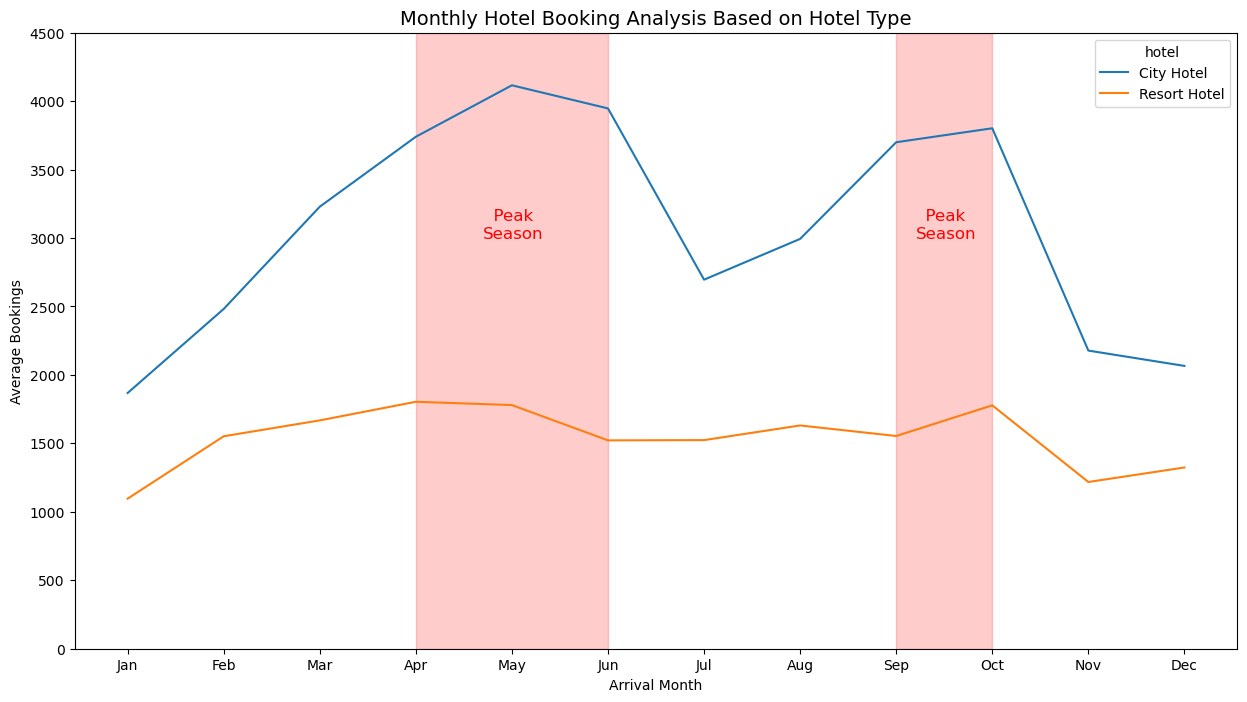

In [20]:
plt.figure(figsize=(15,8))
sns.lineplot(data = bookings, x = 'arrival_date_month', y = 'avg_bookings', hue = 'hotel')
plt.ylim(0,4500) # set the range of y-axis

# set x and y labels
plt.title('Monthly Hotel Booking Analysis Based on Hotel Type', fontsize=14)
plt.xlabel('Arrival Month')
plt.ylabel('Average Bookings')

# replace the xticks with month abbreviation
label = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(bookings['arrival_date_month'].unique(), label)

# highlight area
plt.axvspan(4, 6, color='red', alpha=0.2)
plt.axvspan(9, 10, color='red', alpha=0.2)

# add highlight text
plt.text(4.7, 3000, s='  Peak\nSeason', fontsize=12, color='red')
plt.text(9.2, 3000, s='  Peak\nSeason', fontsize=12, color='red')
plt.show()

**Findings:** Overall, the City Hotel has more average bookings than the Resort Hotel, especially during peak season. The peak season in both hotels is from April to May and September to October. It's probably because, in Indonesia, these months are between the dry and wet seasons. So, the weather is not too hot to explore the tourist destination. Further analysis can be carried out to confirm this.

# Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates
Is there any correlation between the duration of stay and the rate of cancellation of hotel bookings?

First, I will create a `stay_duration` column to sum the total nights the guest stays.

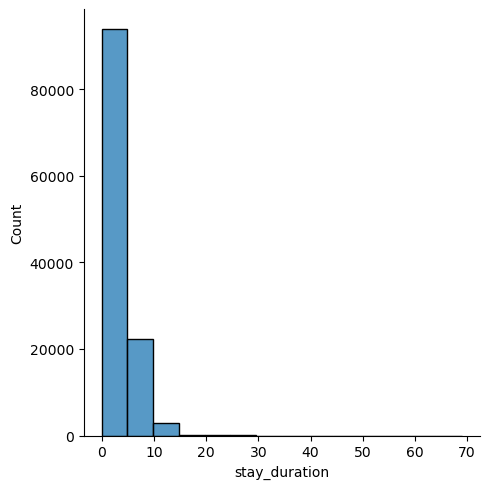

In [21]:
# create new column
df.insert(9, 'stay_duration', df['stays_in_weekdays_nights'] + df['stays_in_weekend_nights'])
# show the distibution of the column
sns.displot(df['stay_duration'], bins=14)

It looks like fewer guests stayed more than 15 days. It can be aggregated into small groups. So, I will aggregate the guests who stayed 15 to 30 days and guests who stayed for 30 days or more.

In [22]:
df['stay_duration'] = np.where(df['stay_duration'] > 14, 15, df['stay_duration'])

Next, I will compare the total bookings canceled to the guest's stay duration.

In [23]:
cancel_dur = df.groupby(['hotel', 'stay_duration', 'is_canceled'])['is_canceled'].count().reset_index(name='total_guest')
cancel_dur = pd.pivot_table(cancel_dur, index = ['hotel', 'stay_duration'], columns = 'is_canceled', values = 'total_guest').reset_index().rename_axis(None, axis=1)
cancel_dur['cancel_pct'] = round(cancel_dur[1] / (cancel_dur[0] + cancel_dur[1]) * 100, 1)
pd.pivot_table(cancel_dur, index=['hotel'], columns='stay_duration', values='cancel_pct')

stay_duration,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
hotel,,,,,,,,,,,,,,,,
City Hotel,6.9,30.9,48.7,44.4,38.6,35.5,45.8,39.2,45.7,43.7,58.3,56.1,46.2,61.9,71.0,72.8
Resort Hotel,3.1,15.1,27.8,32.7,31.2,31.8,32.9,32.8,34.1,35.0,25.5,23.6,43.0,25.0,22.8,45.1


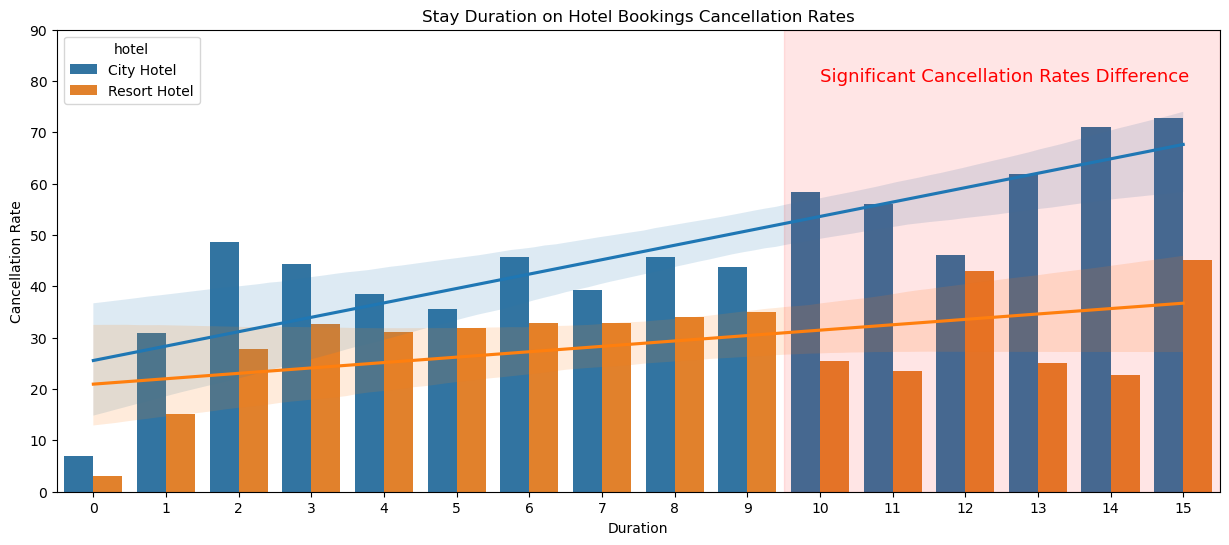

In [24]:
plt.figure(figsize=(15,6))
sns.barplot(data=cancel_dur, x='stay_duration', y='cancel_pct', hue='hotel')
# create trendline
sns.regplot(data=cancel_dur[cancel_dur['hotel'] == 'City Hotel'], x='stay_duration', y='cancel_pct', scatter=False)
sns.regplot(data=cancel_dur[cancel_dur['hotel'] == 'Resort Hotel'], x='stay_duration', y='cancel_pct', scatter=False)
# sns.lmplot(data=cancel_dur, x='stay_duration', y='cancel_pct', hue='hotel' )
plt.xlim(-0.5, 15.5)
plt.ylim(0, 90)
# set title, x and y label
plt.title('Stay Duration on Hotel Bookings Cancellation Rates')
plt.xlabel('Duration')
plt.ylabel('Cancellation Rate')

plt.text(10, 80, s='Significant Cancellation Rates Difference', fontsize=13, color='red')
plt.axvspan(9.5, 15.5, color='red', alpha=0.1)
plt.show()

Based on the trendline, the longer the customer booked, the higher the cancellation rates. We can see that City Hotel has a higher cancellation rate than Resort Hotel. Guest who booked 10 days or more in City Hotel has more than 50% cancellation rates. Meanwhile, in Resort Hotel, the customer that booked for 10 days or more has only about 20% cancellation rates.

# Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate
Is there any correlation between the time interval of hotel bookings and the cancellation rate of hotel bookings?

In [25]:
df['lead_time'].value_counts()

0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
400       1
370       1
532       1
371       1
463       1
Name: lead_time, Length: 479, dtype: int64

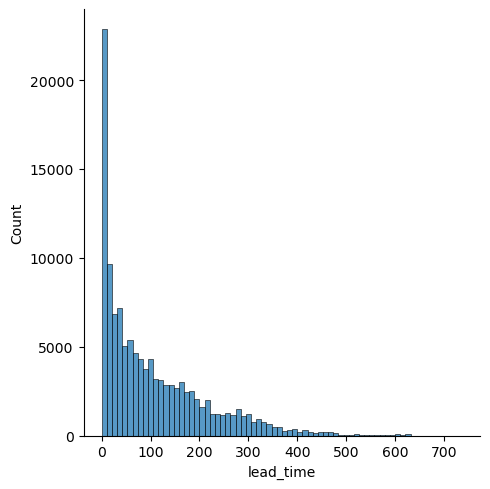

In [26]:
sns.displot(df['lead_time'], bins=70)

The value range is quite wide so I decided to group this into month

In [27]:
df['lead_time'] = np.where(df['lead_time'] > 360, 361, df['lead_time'])
bins = np.arange(min(df['lead_time']), max(df['lead_time']) + 30, 30)
category = [f'{bins[x]}-{bins[x+1]}' for x in range(len(bins)-1)]
category[-1] = '>360'
df.insert(3, 'lead_time_cat', pd.cut(df['lead_time'], bins=bins, labels=category))
df.head(1)

,hotel,is_canceled,lead_time,lead_time_cat,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,stay_duration,guest,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,330-360,2017,7,27,1,0,0,0,2.0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out


In [28]:
time_cancel = df.groupby(['hotel', 'lead_time_cat', 'is_canceled'])['is_canceled'].count().reset_index(name='total_guest')
time_cancel = pd.pivot_table(time_cancel, index=['hotel', 'lead_time_cat'], columns='is_canceled', values='total_guest').reset_index().rename_axis(None, axis=1)
time_cancel['cancel_pct'] = round(time_cancel[1] / (time_cancel[0] + time_cancel[1]) *100, 1)
pd.pivot_table(time_cancel, index='hotel', columns='lead_time_cat', values='cancel_pct')

lead_time_cat,0-30,30-60,60-90,90-120,120-150,150-180,180-210,210-240,240-270,270-300,300-330,330-360,>360
hotel,,,,,,,,,,,,,
City Hotel,24.3,38.8,41.4,46.8,45.3,52.6,49.9,51.1,58.5,73.8,75.7,82.1,72.4
Resort Hotel,15.1,30.8,34.7,38.8,40.8,32.8,37.3,41.8,48.1,38.6,49.5,40.2,38.8


In [29]:
time_cancel

,hotel,lead_time_cat,0,1,cancel_pct
0,City Hotel,0-30,15327,4926,24.3
1,City Hotel,30-60,7281,4608,38.8
2,City Hotel,60-90,5216,3692,41.4
3,City Hotel,90-120,3961,3486,46.8
4,City Hotel,120-150,3070,2543,45.3
5,City Hotel,150-180,2446,2717,52.6
6,City Hotel,180-210,1801,1793,49.9
7,City Hotel,210-240,1225,1280,51.1
8,City Hotel,240-270,882,1242,58.5
9,City Hotel,270-300,660,1859,73.8


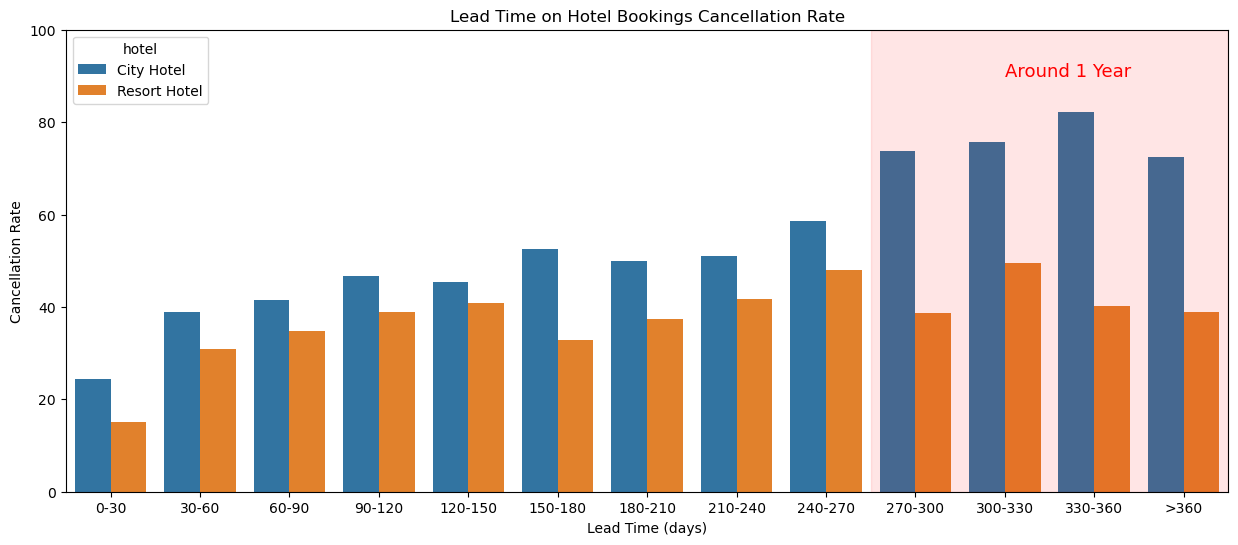

In [30]:
plt.figure(figsize=(15,6))
sns.barplot(data=time_cancel, x='lead_time_cat', y='cancel_pct', hue='hotel')

plt.title('Lead Time on Hotel Bookings Cancellation Rate')
plt.xlabel('Lead Time (days)')
plt.ylabel('Cancellation Rate')

plt.ylim(0,100)
plt.xlim(-0.5,12.5)
plt.text(10, 90, s='Around 1 Year', fontsize=13, color='red')
plt.axvspan(8.5, 12.5, color='red', alpha=0.1)

Generally, City Hotel has higher cancellation rates than Resort Hotel. Especially when customers who booked in City Hotel 10 months or later have more than 70% cancellation rates. On the other hand, in Resort Hotel, customers who booked 10 months or later only have about 40% cancellation rates. Meanwhile, customers who booked less than 1 month have the lowest cancellation rates.